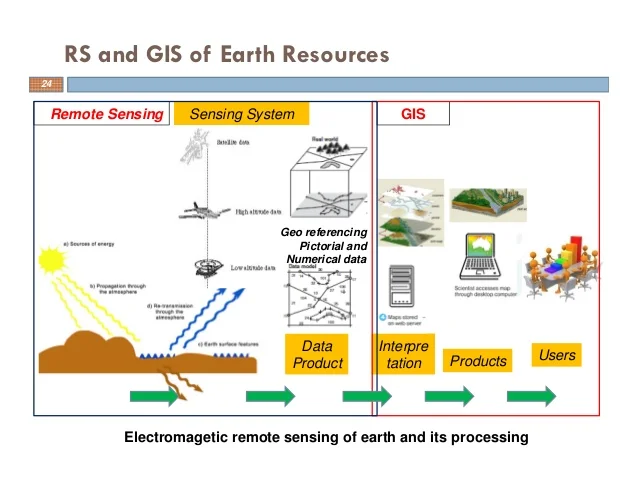

**Project: Solar power potential mapping in India using remote sensing**

**Task covered:**

Technical CSP and SPV Potential mapping of India through solar irradiance and spatial data

*CSP=concentrating solar power*

*SPV=centralized solar photovoltaic*

**Data required:** Digital elevation model (DEM), Global horizontal irradiance (GHI), Direct normal irradiance (DNI) 

**Terminology:**

The term **solar irradiance** represents the power from the sun that reaches a surface per unit area. **Direct irradiance** is the part of the solar irradiance that directly reaches a surface; **diffuse irradiance** is the part that is scattered by the atmosphere; **global irradiance** is the sum of both diffuse and direct components reaching the same surface.

Solar energy potential: Amount of solar energy we could utilize

Photovoltaic (PV): A solar technology that converts sunlight into electrical energy with photovoltaic cells (semiconducting materials).

Solar PV (SPV): It directly converts sunlight or solar radiation into electricity without any interference of heat engine.

Concentrating Solar Power (CSP): CSP technologies only use direct normal component of sunlight intensity. Heat generated is transformed first into mechanical energy and then into electricity.

Direct Normal Irradiance (DNI): DNI is solar radiation that comes in a straight line from the direction of the sun at its current position in the sky.

Global Horizontal Irradiation (GHI): GHI is defined as the total amount of shortwave terrestrial irradiance received by a surface horizontal to the ground.

Digital elevation model (DEM): A DEM is a representation of the bare ground (bare earth) topographic surface of the Earth excluding trees, buildings, and any other surface objects.

Geographical Information System (GIS): A spatial system that creates, manages, analyzes, and maps all types of data. GIS connects data to a map, integrating location data (where things are) with all types of descriptive information (what things are like there). 

Remote Sensing (RS): Remote sensing is the process of detecting and monitoring the physical characteristics of an area by measuring its reflected and emitted radiation at a distance (typically from satellite or aircraft). 

**Workflow of the project**

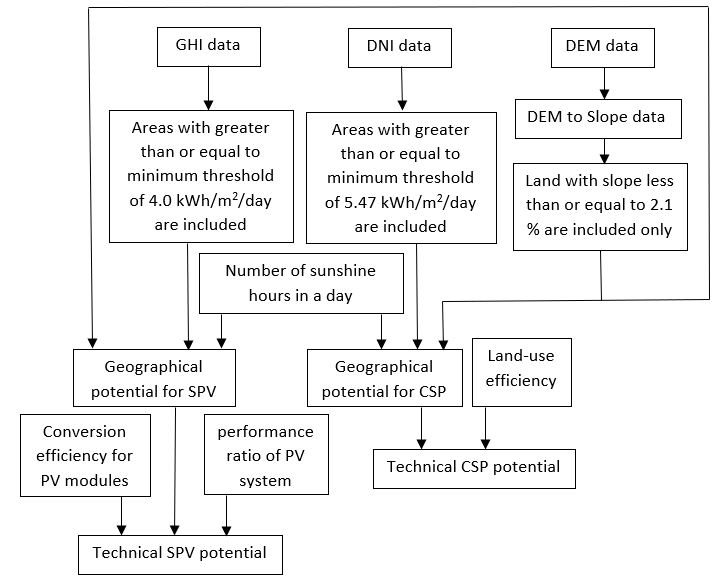

**Libraries used here:**

Matplot: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.


GDAL: GDAL is a translator library for raster and vector geospatial data formats.


Richdem: RichDEM is a set of digital elevation model (DEM) hydrologic analysis tools. 


Numpy: NumPy is the fundamental package for scientific computing in Python for fast operations on arrays.


Tifftools: Tifftools provides a library and a command line program for manipulating TIFF files.



In [1]:
#library for processing of elevation data
!pip install richdem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.0 MB/s 


In [2]:
#library for processing of geospatial data
#!pip install gdal

In [3]:
#library for manupulating tiff data
!pip install tifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.8 MB/s 
  Created wheel for tifftools: filename=tifftools-1.3.5-py3-none-any.whl size=53609 sha256=06ffda85e47a99134dbd48263479fb1e41789377b8755d55de43f6494056729e
  Stored in directory: /root/.cache/pip/wheels/10/6e/2c/72fc11cf0b247f59307616fca8470f0b99418b639cead643a2
Successfully built tifftools


In [4]:
#importing all the necessary libraries

import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import richdem as rd
import tifftools
import numpy as np
from numpy import asarray

**Getting the areas where slope is less than or equal to 2.1%.**

Mounted at /content/drive


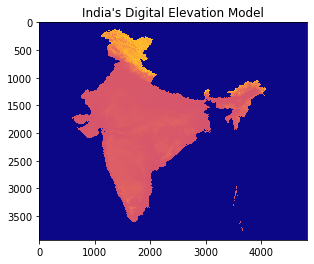

In [5]:
#opening dem data

#varialble for the path of dataset india_dem
path  = "/content/drive/MyDrive/Data to process/india_dem.tif"

#importing the dem data with richdem and gdal
dem = rd.LoadGDAL(path) 

#giving the title for the image to be display
plt.title("India's Digital Elevation Model") 

#displaying the dem image
plt.imshow(dem, interpolation='none', cmap='plasma') 

**Transforming dem data into slope data and saving it**

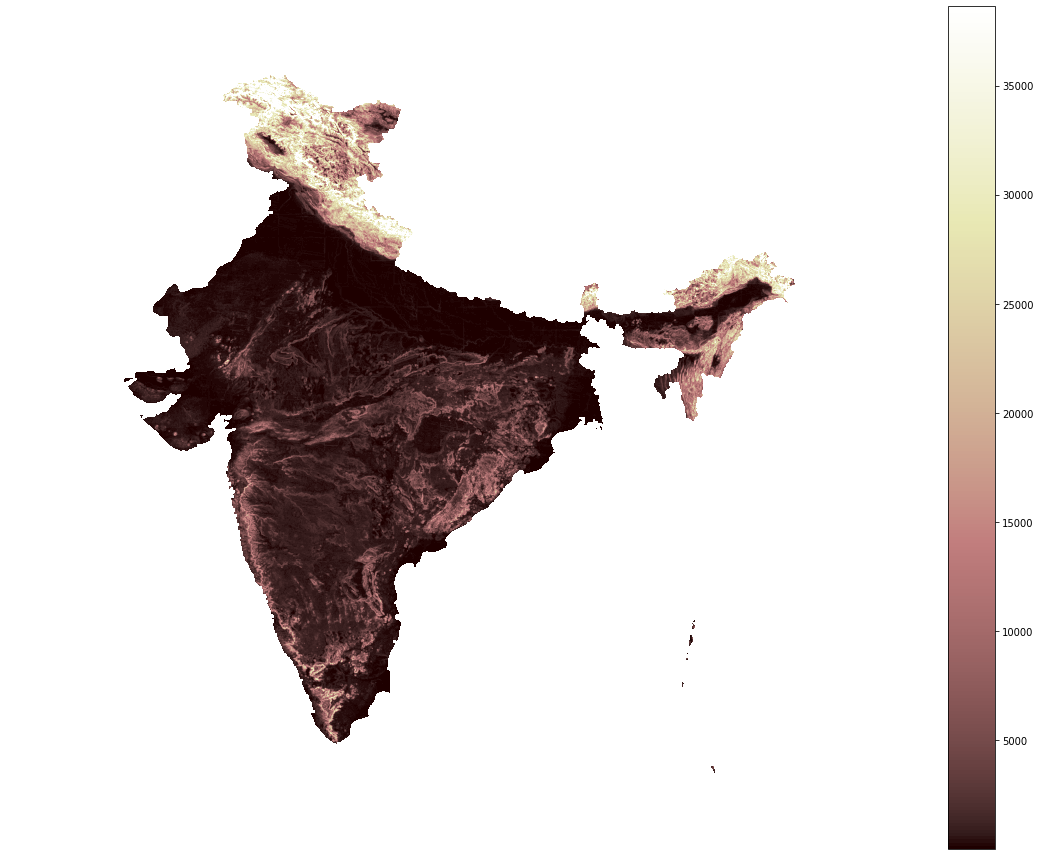

In [6]:
#reading the dem attribute to transform it into terrin slope
slope2 = rd.TerrainAttribute(dem, attrib='slope_riserun') 

#displaying the slope
rd.rdShow(slope2, axes=False, cmap='pink',figsize=(15,12)) 

#saving the slope image into tiff format
rd.SaveGDAL("slope_riserun.tif", slope2) 

In [7]:
#Calculating threshold for slope to be included

#converting slope image to array
slope2_array = np.asarray(slope2)

#calculating average slope
avg=np.average(slope2_array)

#calculating the threshold as 2.1% of average slope
threshold=avg*2.1/100 

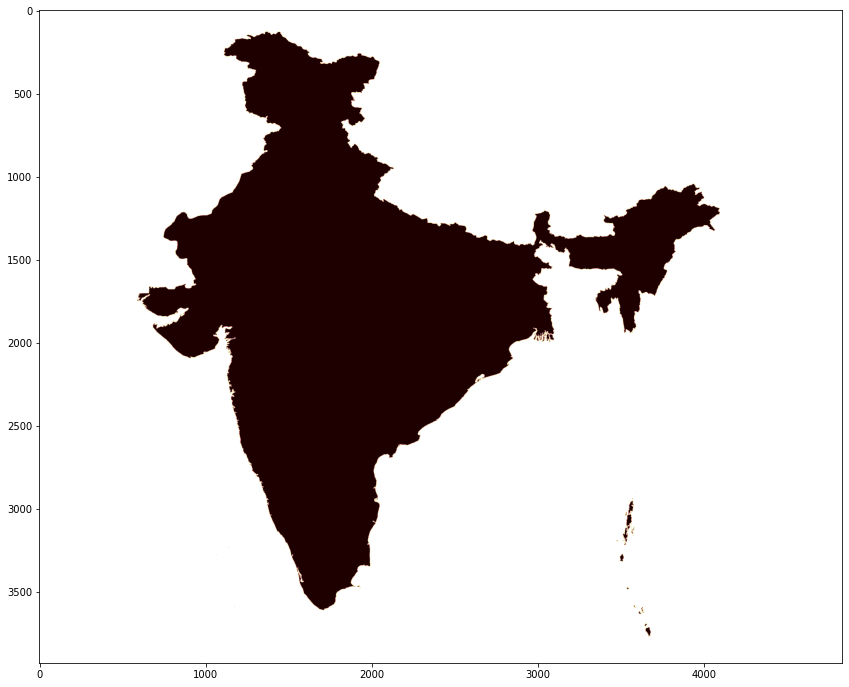

In [8]:
#retreiving the slope to be included for csp and spv
slopeincluded=slope2<=threshold

#figure size to display
plt.figure(figsize=(15,12))

#displaying slope that is considered to include
plt.imshow(slopeincluded, cmap = "pink") 

In [9]:
#saving the obtained image
rd.SaveGDAL("slopeincluded.tif", slopeincluded)

**Getting the areas where GHI is greater than or equal to 4.0 kWh/m2/day**

In [10]:
#variable for path of dataset ghi
path1  = "/content/drive/MyDrive/Data to process/ghi.tif"

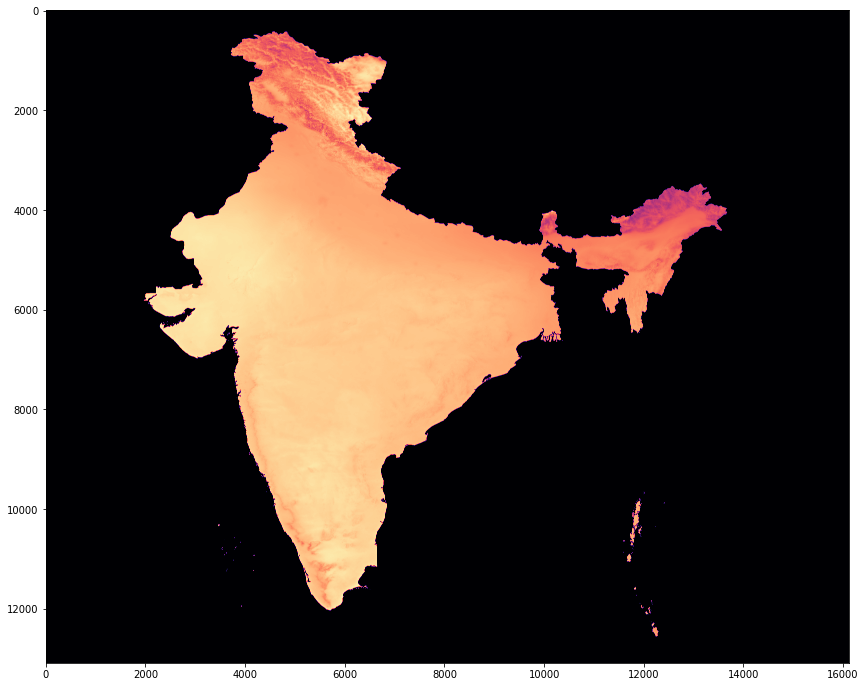

In [11]:
#displaying ghi for a certain figure size

GHI=rd.LoadGDAL(path1)
plt.figure(figsize=(15,12))
plt.imshow(GHI, cmap = "magma")

In [12]:
#threshold for ghi to include
threshold=4

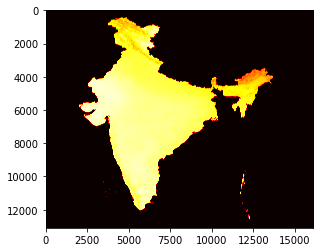

In [13]:
#ghi less than threshold is excluded from the calculation

ghiexcluded=GHI<threshold

#calculating ghi after the exclusion and displaying it
ghi_included=GHI-ghiexcluded
plt.imshow(ghi_included, cmap = "hot")

In [14]:
#saving included ghi in tiff format
rd.SaveGDAL("ghi_included.tif", ghi_included)

**Geographical potential for spv**

In [15]:
#ghi is the insolation layer for spv
I_ghi="/content/drive/MyDrive/Data from google colab/ghi_included.tif"
insolation_ghi = rd.LoadGDAL(I_ghi)

#no. of sunshine hours in a day
h=8

#calculating and saving isolation of geographical potential for SPV
G1=insolation_ghi/h 
rd.SaveGDAL("G1.tif", G1)

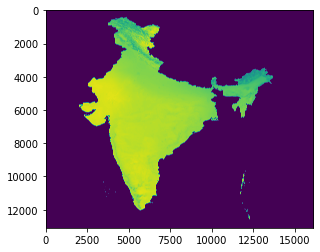

In [16]:
plt.imshow(G1)

In [17]:
#overlaying included slope area and isolation to get final Geographical potential for spv

input1 = tifftools.read_tiff('/content/G1.tif')
input2 = tifftools.read_tiff('/content/slopeincluded.tif')

# Add input2 to input1
input1['ifds'].extend(input2['ifds'])

#saving overlayed image
tifftools.write_tiff(input1, 'Gi_ghi.tif')

**SPV Potential areas**

In [ ]:
#calling geographical potential for SPV
G="/content/Gi_ghi.tif"
geographical_potential_ghi = rd.LoadGDAL(G)

#conversion efficiency for PV modules which depends on type of PV cells and module temperature
Nm=12 

#performance ratio of PV system which is the ratio of field performance of the system to its performance in standard test condition
Pr=0.75 

#calculating technical potential of SPV
Ei_spv=geographical_potential_ghi*Nm*Pr 

In [ ]:
#saving technical potential of SPV
rd.SaveGDAL("Ei_spv.tif", Ei_spv)

In [ ]:
#displaying final data of technical spv potential
spv=rd.LoadGDAL('/content/drive/MyDrive/Data from google colab/Ei_spv.tif')
rd.rdShow(spv, axes=False, cmap='hot', figsize=(15,12))

**Getting the areas where DNI is greater than or equal to 5.47 kWh/m2/day**

In [ ]:
#variable for path of dataset dni
path2  = "/content/drive/MyDrive/Data to process/dni.tif"

In [ ]:
#calling dni
dni = rd.LoadGDAL(path2)

#image title to display
plt.title("India's Direct Normal Irradiance")

#displaying ghi
plt.imshow(dni, cmap = "magma")

In [ ]:
#displaying ghi for a certain figure size

DNI=rd.LoadGDAL(path2)
plt.figure(figsize=(15,12))
plt.imshow(DNI, cmap = "magma")

In [ ]:
#threshold for dni to include
threshold=5.47

#dni less than threshold is excluded from the calculation

dniexcluded=DNI<threshold

dni_included=DNI-dniexcluded
plt.title("DNI Considered")
plt.imshow(dni_included, cmap = "hot")

#saving included dni in tiff format
rd.SaveGDAL("dni_included.tif", dni_included)

**Geographical potential for csp**

In [ ]:
#dni is the insolation layer for csp
I_dni="/content/drive/MyDrive/Data from google colab/dni_included.tif"
insolation_dni = rd.LoadGDAL(I_dni)

#no. of sunshine hours in a day
h=8 

#calculating and saving isolation of Geographical potential for CSP
G2=insolation_dni/h 
rd.SaveGDAL("G2.tif", G2)

In [ ]:
#overlaying included slope area and isolation to get final Geographical potential for CSP

input3 = tifftools.read_tiff('/content/drive/MyDrive/Data from google colab/G2.tif')
input4 = tifftools.read_tiff('/content/drive/MyDrive/Data from google colab/slopeincluded.tif')

# Add input4 to input3
input3['ifds'].extend(input4['ifds'])

#saving overlayed image
tifftools.write_tiff(input3, 'Gi_dni.tif')

**CSP Potential areas**

In [ ]:
#calling geographical potential for CSP
D="/content/drive/MyDrive/Data from google colab/Gi_dni.tif"
geographical_potential_dni = rd.LoadGDAL(D)

#land-use efficiency which is the product of land-use factor and solar to electric conversion efficiency
L=5 

#technical potential of CSP
Ei_csp=geographical_potential_dni*L 

In [ ]:
#saving technical potential of CSP
rd.SaveGDAL("Ei_csp.tif", Ei_csp)

In [ ]:
#displaying final data of technical csp potential
csp=rd.LoadGDAL('/content/drive/MyDrive/Data from google colab/Ei_csp.tif')
rd.rdShow(csp, axes=False, cmap='hot', figsize=(15,12))

**Task for self exercise:** Identification of roof-top solar panels